In [11]:
# Exploratory Data Analysis for Sales Lead Scoring
# This notebook provides Data Cleaning steps and comprehensive EDA for the sales pipeline project

print("="*80)
print("--- Data Cleaning and Exploratory Data Analysis for Sales Lead Scoring ---")
print("="*80)

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

--- Data Cleaning and Exploratory Data Analysis for Sales Lead Scoring ---
Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5


In [12]:
# Load the Dataset

print("="*80)
print("--- Loading the Dataset ---")
print("="*80)

file_path = 'sales_leads_dataset_1000_leads.csv'
df = pd.read_csv('../data/sales_leads_dataset_1000_leads.csv')

print("Dataset loaded successfully!")
print(df.head())

--- Loading the Dataset ---
Dataset loaded successfully!
     lead_id company_size     industry  annual_revenue_lkr    location  \
0  LEAD_0001       Medium  Agriculture           116701433       Kandy   
1  LEAD_0002       Medium      Finance           142242154  Kurunegala   
2  LEAD_0003       Medium  IT/Software           134980432  Kurunegala   
3  LEAD_0004        Small      Tourism             7239690     Colombo   
4  LEAD_0005       Medium  IT/Software           128031305      Jaffna   

   engagement_score  website_visits  email_opens demo_requested  \
0                87              25           16             No   
1                77              45            4             No   
2               100              27            7            Yes   
3               100              33           11             No   
4                48              17            3             No   

   days_since_first_contact contact_level  budget_indicated_lkr  \
0                        15 

In [13]:
print("--- Basic Information ---")
print("="*50)

# Basic Information

print("DATASET OVERVIEW")
print("="*50)
print(df.info())

print("\n STATISTICAL SUMMARY")
print("="*50)
print(df.describe())

print("\n TARGET VARIABLE DISTRIBUTION")
print("="*50)
print(df['converted'].value_counts())
print(f"\nConversion Rate: {df['converted'].mean()*100:.2f}%")

--- Basic Information ---
DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   lead_id                   1000 non-null   object
 1   company_size              1000 non-null   object
 2   industry                  1000 non-null   object
 3   annual_revenue_lkr        1000 non-null   int64 
 4   location                  1000 non-null   object
 5   engagement_score          1000 non-null   int64 
 6   website_visits            1000 non-null   int64 
 7   email_opens               1000 non-null   int64 
 8   demo_requested            1000 non-null   object
 9   days_since_first_contact  1000 non-null   int64 
 10  contact_level             1000 non-null   object
 11  budget_indicated_lkr      1000 non-null   int64 
 12  competitor_using          1000 non-null   object
 13  referral_source           1000 non-n

In [14]:
# Check for missing values and duplicates
print(f"Missing values:\n{df.isnull().sum()}")
print(f"\nTotal duplicate rows: {df.duplicated().sum()}")

Missing values:
lead_id                     0
company_size                0
industry                    0
annual_revenue_lkr          0
location                    0
engagement_score            0
website_visits              0
email_opens                 0
demo_requested              0
days_since_first_contact    0
contact_level               0
budget_indicated_lkr        0
competitor_using            0
referral_source             0
converted                   0
dtype: int64

Total duplicate rows: 0


In [15]:
# Data Cleaning: Strip whitespace from categorical data
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()

In [16]:
print("\n--- Cleaned Data Preview ---")
print(df.head())


--- Cleaned Data Preview ---
     lead_id company_size     industry  annual_revenue_lkr    location  \
0  LEAD_0001       Medium  Agriculture           116701433       Kandy   
1  LEAD_0002       Medium      Finance           142242154  Kurunegala   
2  LEAD_0003       Medium  IT/Software           134980432  Kurunegala   
3  LEAD_0004        Small      Tourism             7239690     Colombo   
4  LEAD_0005       Medium  IT/Software           128031305      Jaffna   

   engagement_score  website_visits  email_opens demo_requested  \
0                87              25           16             No   
1                77              45            4             No   
2               100              27            7            Yes   
3               100              33           11             No   
4                48              17            3             No   

   days_since_first_contact contact_level  budget_indicated_lkr  \
0                        15       Manager              

In [17]:
# Save the cleaned dataset for the next step (Preprocessing)
df.to_csv('../data/cleaned_sales_leads_dataset.csv', index=False)

--- Conversion Rate by Category ---


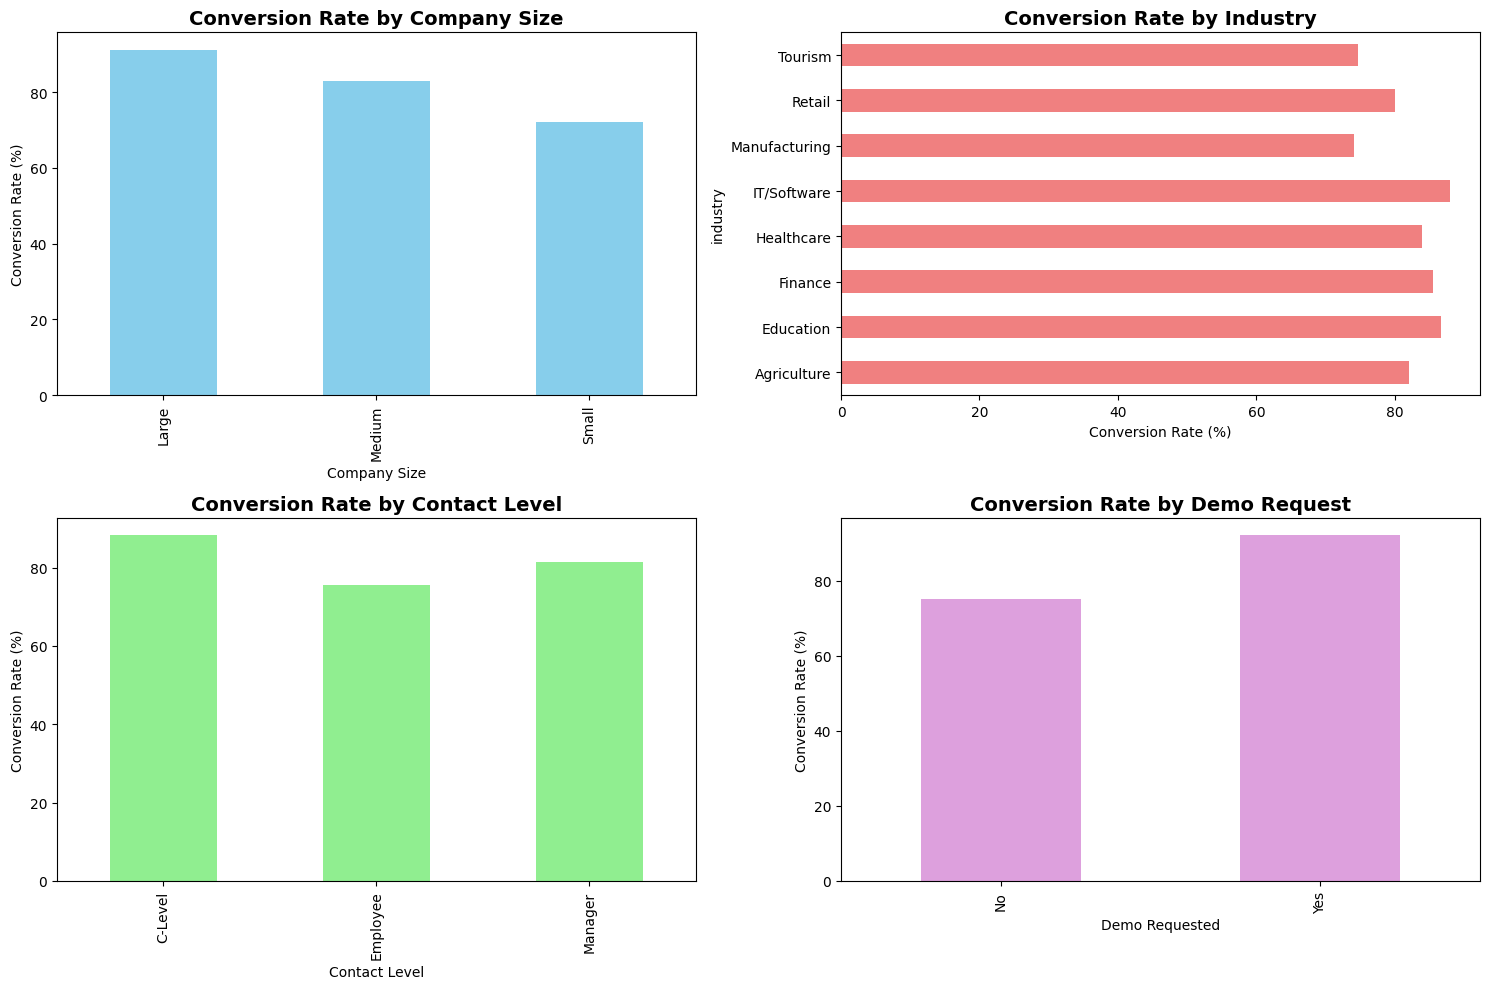


 Key Insights:
• Large companies convert at 91.2%
• C-Level contacts convert at 88.2%
• Demo requests increase conversion to 92.1%


In [18]:
# Conversion Rate by Category

print("="*50)
print("--- Conversion Rate by Category ---")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# By Company Size
size_conv = df.groupby('company_size')['converted'].agg(['sum', 'count', 'mean'])
size_conv['rate'] = size_conv['mean'] * 100
size_conv['rate'].plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Conversion Rate by Company Size', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Conversion Rate (%)')
axes[0,0].set_xlabel('Company Size')

# By Industry
industry_conv = df.groupby('industry')['converted'].agg(['sum', 'count', 'mean'])
industry_conv['rate'] = industry_conv['mean'] * 100
industry_conv['rate'].plot(kind='barh', ax=axes[0,1], color='lightcoral')
axes[0,1].set_title('Conversion Rate by Industry', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Conversion Rate (%)')

# By Contact Level
contact_conv = df.groupby('contact_level')['converted'].agg(['sum', 'count', 'mean'])
contact_conv['rate'] = contact_conv['mean'] * 100
contact_conv['rate'].plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Conversion Rate by Contact Level', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Conversion Rate (%)')
axes[1,0].set_xlabel('Contact Level')

# By Demo Requested
demo_conv = df.groupby('demo_requested')['converted'].agg(['sum', 'count', 'mean'])
demo_conv['rate'] = demo_conv['mean'] * 100
demo_conv['rate'].plot(kind='bar', ax=axes[1,1], color='plum')
axes[1,1].set_title('Conversion Rate by Demo Request', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Conversion Rate (%)')
axes[1,1].set_xlabel('Demo Requested')

plt.tight_layout()
plt.show()

print("\n Key Insights:")
print(f"• Large companies convert at {size_conv.loc['Large', 'rate']:.1f}%")
print(f"• C-Level contacts convert at {contact_conv.loc['C-Level', 'rate']:.1f}%")
print(f"• Demo requests increase conversion to {demo_conv.loc['Yes', 'rate']:.1f}%")

--- Engagement Score Analysis ---


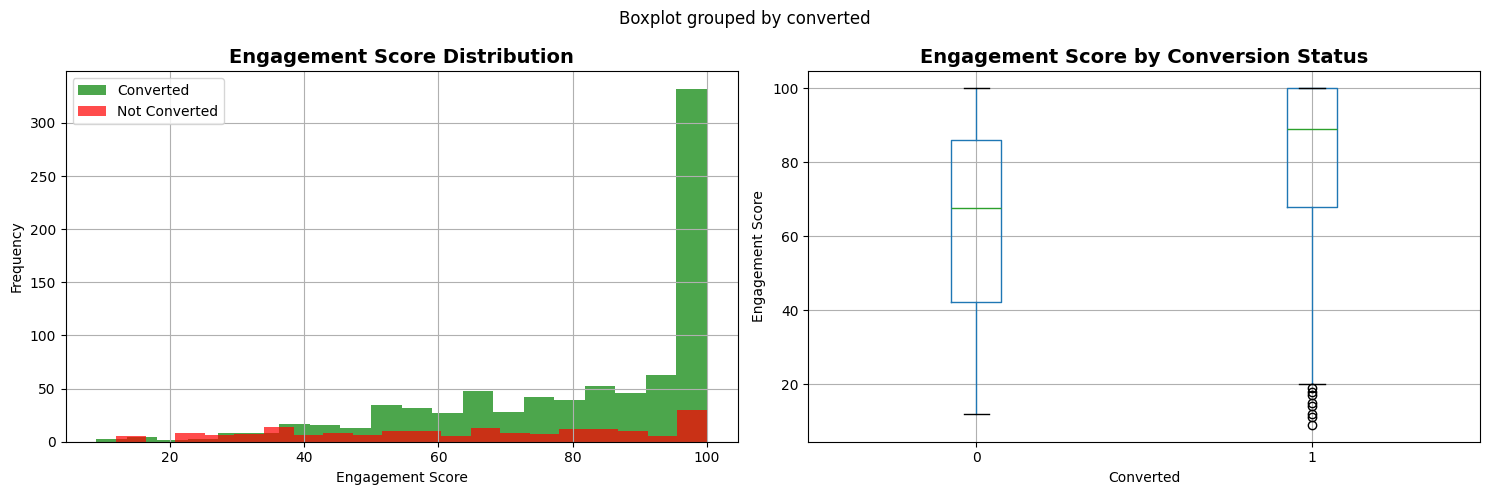


 Engagement Statistics:
Average engagement (converted): 81.67
Average engagement (not converted): 64.61


In [19]:
# Engagement Score Analysis

print("="*50)
print("--- Engagement Score Analysis ---")
print("="*50)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Engagement score distribution by conversion
df[df['converted']==1]['engagement_score'].hist(bins=20, alpha=0.7, label='Converted', ax=axes[0], color='green')
df[df['converted']==0]['engagement_score'].hist(bins=20, alpha=0.7, label='Not Converted', ax=axes[0], color='red')
axes[0].set_title('Engagement Score Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Engagement Score')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Box plot
df.boxplot(column='engagement_score', by='converted', ax=axes[1])
axes[1].set_title('Engagement Score by Conversion Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Converted')
axes[1].set_ylabel('Engagement Score')

plt.tight_layout()
plt.show()

print("\n Engagement Statistics:")
print(f"Average engagement (converted): {df[df['converted']==1]['engagement_score'].mean():.2f}")
print(f"Average engagement (not converted): {df[df['converted']==0]['engagement_score'].mean():.2f}")

In [20]:
print("\n" + "="*70)
print(" Data Cleanining and EDA is Completed!")
print("="*70)

print(f"\n Files Created:")
print(f"   • data/cleaned_sales_leads_dataset.csv ")

print(f"\n Next Steps:")
print(f"   1. Run notebook 02 for Model Building")


 Data Cleanining and EDA is Completed!

 Files Created:
   • data/cleaned_sales_leads_dataset.csv 

 Next Steps:
   1. Run notebook 02 for Model Building
